In [1]:
from torch.utils.data import DataLoader, Dataset
import torch
import argparse
import torch.nn as nn

import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import os
import pandas as pd
import torch.optim as optim
import random
import torch.nn.functional as F
from sklearn import metrics
from tqdm.notebook import tqdm
import gc
import shutil
import pywt

In [2]:
pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 28.0 MB/s eta 0:00:00


In [3]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf

subject_number = 109
tasks_number = 14

for i in range(1, subject_number):
  # for j in range(1, tasks_number):
  eegbci.load_data(i, [3, 7, 11], './')



Do you want to set the path:
    /content
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 11s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 09s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 07s (5.9 MB)


Download complete in 09s (8.5 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 07s (5.9 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 07s (5.9 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


Download complete in 08s (7.3 MB)


Download complete in 09s (7.4 MB)


Download complete in 08s (7.4 MB)


Download complete in 08s (7.3 MB)


In [4]:
import os
import numpy as np
from tqdm.notebook import tqdm

dataset_path = './MNE-eegbci-data/files/eegmmidb/1.0.0'

def readEdf(file_path):
  x_raw = [read_raw_edf(file_path, preload=True)]
  x_concatened = concatenate_raws(x_raw)
  events, event_ids = mne.events_from_annotations(x_concatened, event_id='auto')
  x_data = x_concatened.get_data()
  return x_data, x_concatened, events, event_ids


trainset = []
gt = []

for folder in os.listdir(dataset_path):
  for filename in os.listdir(dataset_path+'/'+folder):
    file_path = dataset_path+'/'+folder+'/'+filename
    x, x_obj, events, event_ids = readEdf(file_path)
    x_float = x.T.astype(np.float32)

    for j in range(len(events)-1):
      raw = np.zeros((1,640))
      signal_start = events[j][0]
      signal_end = events[j+1][0]

      delta_segmento = signal_end - signal_start

      label = events[j][2]

      if(delta_segmento >= 640):
        channels = [ch.replace('.','').upper() for ch in x_obj.ch_names]
        for index in range(0, len(channels)-1):
          signal = x[index][signal_start:signal_start+640]
          for j_raw in range(0, raw.shape[1]):
            raw[index][j_raw] = signal[j_raw]

          raw = np.append(raw, np.zeros((1,640)), axis=0)

        trainset.append(pd.DataFrame(raw.T.astype(np.float32), columns=channels))
        gt.append(events[j])




Extracting EDF parameters from /content/MNE-eegbci-data/files/eegmmidb/1.0.0/S052/S052R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /content/MNE-eegbci-data/files/eegmmidb/1.0.0/S052/S052R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /content/MNE-eegbci-data/files/eegmmidb/1.0.0/S052/S052R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /content/MNE-eegbci-data/files/eegmmidb/1.0.0/S043/S043R11.edf...
EDF file detected
Setting channel info struct

<ipython-input-4-9b928c057a0e>:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  x_raw = [read_raw_edf(file_path, preload=True)]


Extracting EDF parameters from /content/MNE-eegbci-data/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-4-9b928c057a0e>:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  x_raw = [read_raw_edf(file_path, preload=True)]


Extracting EDF parameters from /content/MNE-eegbci-data/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-4-9b928c057a0e>:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  x_raw = [read_raw_edf(file_path, preload=True)]


Extracting EDF parameters from /content/MNE-eegbci-data/files/eegmmidb/1.0.0/S054/S054R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /content/MNE-eegbci-data/files/eegmmidb/1.0.0/S054/S054R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /content/MNE-eegbci-data/files/eegmmidb/1.0.0/S054/S054R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /content/MNE-eegbci-data/files/eegmmidb/1.0.0/S073/S073R11.edf...
EDF file detected
Setting channel info struct

In [ ]:
def create_array(x):
  return np.array([1.0 if i+1 == x else 0.0 for i in range(0, 3)])

In [ ]:
X = pd.concat(trainset)
X_train = np.asarray(X.astype(float))

gt_array = []
for i in range(0,len(gt)):
  array = create_array(gt[i][2])
  a = pd.DataFrame(array)
  a = a.T
  a.columns=['T1', 'T2', 'T3']
  gt_array.append(a)

y = pd.concat(gt_array)
y_train = np.asarray(y.astype(float))


In [ ]:
y

,T1,T2,T3
0,1.0,0.0,0.0
0,0.0,0.0,1.0
0,1.0,0.0,0.0
0,0.0,1.0,0.0
0,1.0,0.0,0.0
...,...,...,...
0,1.0,0.0,0.0
0,0.0,0.0,1.0
0,1.0,0.0,0.0
0,0.0,1.0,0.0


In [ ]:
X

,FC5,FC3,FC1,FCZ,FC2,FC4,FC6,C5,C3,C1,...,P8,PO7,PO3,POZ,PO4,PO8,O1,OZ,O2,IZ
0,0.000087,0.000067,0.000068,0.000068,0.000067,0.000068,0.000075,0.000064,0.000039,0.000056,...,-0.000038,-0.000045,-0.000053,-0.000053,-0.000059,-0.000112,-0.000073,-0.000068,-0.000069,0.0
1,-0.000064,-0.000068,-0.000073,-0.000073,-0.000075,-0.000077,-0.000060,-0.000085,-0.000099,-0.000081,...,-0.000026,-0.000029,-0.000027,-0.000011,-0.000023,-0.000092,-0.000031,-0.000023,-0.000026,0.0
2,0.000007,0.000020,0.000022,0.000021,0.000022,0.000026,0.000041,0.000030,0.000012,0.000041,...,0.000048,0.000036,0.000035,0.000045,0.000030,-0.000053,0.000012,0.000020,0.000011,0.0
3,0.000060,0.000057,0.000054,0.000048,0.000046,0.000042,0.000041,0.000031,0.000013,0.000035,...,-0.000084,-0.000082,-0.000090,-0.000083,-0.000099,-0.000152,-0.000105,-0.000099,-0.000105,0.0
4,-0.000042,-0.000048,-0.000051,-0.000058,-0.000058,-0.000066,-0.000070,-0.000044,-0.000062,-0.000043,...,0.000039,0.000039,0.000039,0.000053,0.000045,-0.000042,0.000038,0.000041,0.000044,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.000158,-0.000030,-0.000025,0.000341,-0.000002,0.000166,0.000027,0.000113,-0.000063,0.000207,...,0.000361,0.000242,0.000126,-0.000036,0.000018,0.000211,0.000080,-0.000002,0.000026,0.0
636,-0.000110,0.000010,0.000018,0.000380,0.000037,0.000206,0.000067,0.000136,-0.000026,0.000254,...,0.000371,0.000243,0.000083,-0.000073,-0.000006,0.000166,0.000041,-0.000039,-0.000026,0.0
637,-0.000147,-0.000025,-0.000011,0.000358,0.000021,0.000188,0.000035,0.000090,-0.000063,0.000225,...,0.000374,0.000232,0.000095,-0.000044,0.000040,0.000200,0.000061,-0.000003,0.000018,0.0
638,-0.000131,0.000018,0.000031,0.000393,0.000062,0.000213,0.000054,0.000118,-0.000020,0.000273,...,0.000398,0.000264,0.000120,-0.000036,0.000050,0.000210,0.000089,0.000022,0.000035,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
import scipy.signal as signal
scaler= StandardScaler()

def data_preprocess_train(X):
    X_prep=scaler.fit_transform(X)
    #do here your preprocessing
    return X_prep

def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db2', level=3):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

def normalize(x):
  # fit scaler on training data
  norm = MinMaxScaler().fit(x)
  # transform training data
  X_train_norm = norm.transform(x)
  return X_train_norm

def passa_banda(array, cutoff_low, cutoff_high):
  """
  Filtra um array de X linhas e Y colunas com um filtro de passa-banda.

  Args:
    array: Array a ser filtrado.
    cutoff_low: Frequência de corte inferior do filtro.
    cutoff_high: Frequência de corte superior do filtro.

  Returns:
    Array filtrado.
  """

  # Cria um filtro de passa-banda.
  filtro = np.zeros((2 * cutoff_high + 1, 2 * cutoff_high + 1))
  for i in range(-cutoff_low, cutoff_high + 1):
    for j in range(-cutoff_low, cutoff_high + 1):
      filtro[i + cutoff_low, j + cutoff_low] = 1
  filtro /= filtro.sum()

  # Aplica o filtro ao array.
  return signal.convolve2d(array, filtro, mode="same")

In [ ]:
X_train

array([[ 8.70000003e-05,  6.70000009e-05,  6.80000012e-05, ...,
        -6.80000012e-05, -6.90000015e-05,  0.00000000e+00],
       [-6.39999998e-05, -6.80000012e-05, -7.30000029e-05, ...,
        -2.30000005e-05, -2.59999997e-05,  0.00000000e+00],
       [ 7.00000010e-06,  1.99999995e-05,  2.20000002e-05, ...,
         1.99999995e-05,  1.10000001e-05,  0.00000000e+00],
       ...,
       [-1.46999999e-04, -2.49999994e-05, -1.10000001e-05, ...,
        -3.00000011e-06,  1.80000006e-05,  0.00000000e+00],
       [-1.30999993e-04,  1.80000006e-05,  3.09999996e-05, ...,
         2.20000002e-05,  3.50000009e-05,  0.00000000e+00],
       [-5.80000014e-05,  5.99999985e-05,  4.89999984e-05, ...,
        -2.40000008e-05, -1.10000001e-05,  0.00000000e+00]])

In [ ]:
x_train_butter=wavelet_denoising(X_train)
x_train_butter=normalize(X_train)
#x_train_butter=passa_banda(x_train_butter, 8, 12)
x_train=data_preprocess_train(x_train_butter)
x_train

array([[ 1.33077126,  1.03443489,  1.05585816, ..., -1.07148813,
        -1.08707238,  0.        ],
       [-0.83156493, -0.92287511, -1.00687013, ..., -0.33405763,
        -0.37119931,  0.        ],
       [ 0.18516268,  0.35300103,  0.38291135, ...,  0.37059817,
         0.24478447,  0.        ],
       ...,
       [-2.02013381, -0.29943561, -0.09985484, ..., -0.00631074,
         0.36132195,  0.        ],
       [-1.79101202,  0.32400386,  0.51457484, ...,  0.40337287,
         0.64434153,  0.        ],
       [-0.74564431,  0.93294471,  0.77790183, ..., -0.35044498,
        -0.12147616,  0.        ]])

In [ ]:
# x_train.shape
a = x_train.shape[0] // 640
(a * 0.80) //1

7460.0

In [ ]:
# num_medicoes = x_train.shape[0] // 640
# num_medicoes_treino = num_medicoes // 2
# num_medicoes_validacao = num_medicoes // 4
# num_medicoes_teste = num_medicoes // 4

num_medicoes = x_train.shape[0] // 640
num_medicoes_treino = int((num_medicoes * 0.80) // 1)
num_medicoes_validacao = int((num_medicoes * 0.10) // 1)
num_medicoes_teste = int((num_medicoes * 0.10) // 1)

xtrain = x_train[0:(num_medicoes_treino*640)]
xval = x_train[num_medicoes_treino*640:(num_medicoes_treino+num_medicoes_validacao)*640]
xtest = x_train[(num_medicoes_treino+num_medicoes_validacao)*640:(num_medicoes_treino+num_medicoes_validacao+num_medicoes_teste)*640]

print(xtrain.shape, xval.shape, xtest.shape)

(4774400, 64) (596480, 64) (596480, 64)


In [ ]:
print(num_medicoes_treino, num_medicoes_validacao, num_medicoes_teste)
print(num_medicoes_treino+num_medicoes_validacao+num_medicoes_teste)

7460 932 932
9324


In [ ]:
ytrain = y_train[0:num_medicoes_treino]
yval = y_train[num_medicoes_treino:num_medicoes_treino+num_medicoes_validacao]
ytest = y_train[num_medicoes_treino+num_medicoes_validacao:num_medicoes_treino+num_medicoes_validacao+num_medicoes_teste]

In [ ]:
print(ytrain.shape, yval.shape, ytest.shape)

(7460, 3) (932, 3) (932, 3)


In [ ]:
xtest.shape

(596480, 64)

In [ ]:
ye = pd.DataFrame(y_train)
ye.columns=['T0', 'T1', 'T2']
categories = list(ye.columns.values)

In [ ]:
ye

,T0,T1,T2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
9321,1.0,0.0,0.0
9322,0.0,0.0,1.0
9323,1.0,0.0,0.0
9324,0.0,1.0,0.0


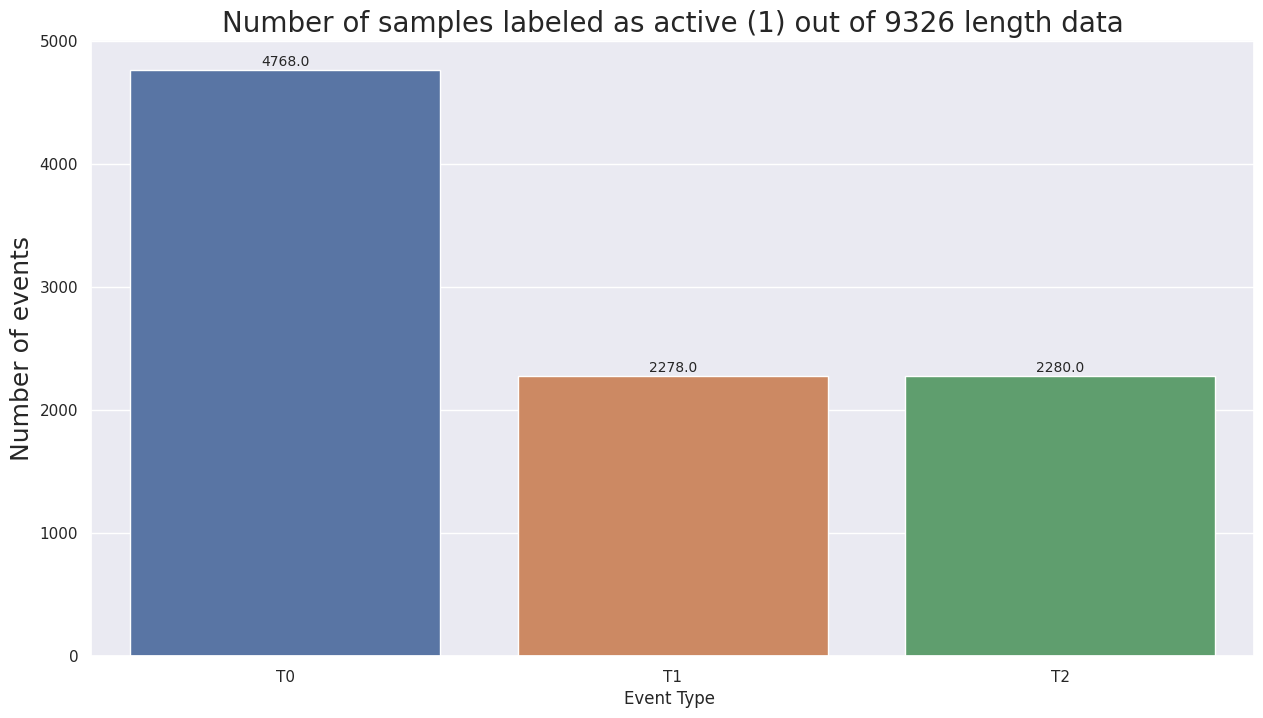

In [ ]:
import seaborn as sns
sns.set(font_scale = 1)
plt.figure(figsize=(15,8))
values = ye.iloc[:, 0:].sum().values
ax= sns.barplot(x=categories, y=values)
plt.title("Number of samples labeled as active (1) out of {0} length data".format((ye.shape[0])),fontsize=20)

plt.ylabel('Number of events', fontsize=18)
plt.xlabel('Event Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = ye.iloc[:,0:].sum().values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=10)
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf

In [ ]:
import numpy as np
load = 1
time_steps = 1000
subsample = 50
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (7,7), padding = "same", activation = "relu", input_shape = (640, 64, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = "same", activation = "relu", input_shape = (640, 64, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu", input_shape = (640, 64, 1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(3, activation = "sigmoid"))


adam = Adam(lr = 0.0001)

model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ['accuracy','mse', 'AUC'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 640, 64, 64)       3200      
                                                                 
 batch_normalization (Batch  (None, 640, 64, 64)       256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 640, 64, 64)       102464    
                                                                 
 batch_normalization_1 (Bat  (None, 640, 64, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 640, 64, 64)       36928     
                                                                 
 batch_normalization_2 (Bat  (None, 640, 64, 64)       2

In [ ]:
xtrain_blocks = np.array_split(xtrain, len(ytrain))
xval_blocks = np.array_split(xval, len(yval))

In [ ]:
ytrain_unique_idx = np.nonzero(ytrain)[0]
ytrain_unique = ytrain[ytrain_unique_idx]

In [ ]:
x_train_parsed = np.array(xtrain_blocks)
x_val_parsed = np.array(xval_blocks)

In [ ]:
y_train_parsed = np.array(ytrain)
y_val_parsed = np.array(yval)

In [ ]:
print(x_train_parsed.shape, y_train_parsed.shape)

(7460, 640, 64) (7460, 3)


In [ ]:
model.fit(x_train_parsed, y_train_parsed, epochs=50, batch_size=32, validation_data=(x_val_parsed,y_val_parsed))

Epoch 1/50
234/234 [==============================] - 80s 262ms/step - loss: 0.5860 - accuracy: 0.5784 - mse: 0.1951 - auc: 0.7410 - val_loss: 0.7006 - val_accuracy: 0.5118 - val_mse: 0.2500 - val_auc: 0.6927
Epoch 2/50
234/234 [==============================] - 62s 264ms/step - loss: 0.4024 - accuracy: 0.7367 - mse: 0.1273 - auc: 0.8812 - val_loss: 0.4838 - val_accuracy: 0.6513 - val_mse: 0.1582 - val_auc: 0.8156
Epoch 3/50
234/234 [==============================] - 62s 264ms/step - loss: 0.3124 - accuracy: 0.8038 - mse: 0.0960 - auc: 0.9311 - val_loss: 0.4856 - val_accuracy: 0.6459 - val_mse: 0.1572 - val_auc: 0.8284
Epoch 4/50
234/234 [==============================] - 62s 264ms/step - loss: 0.2151 - accuracy: 0.8830 - mse: 0.0625 - auc: 0.9695 - val_loss: 0.5444 - val_accuracy: 0.6513 - val_mse: 0.1664 - val_auc: 0.8214
Epoch 5/50
234/234 [==============================] - 62s 264ms/step - loss: 0.1224 - accuracy: 0.9475 - mse: 0.0325 - auc: 0.9920 - val_loss: 0.6277 - val_accuracy

In [ ]:
model.save('./content/drive/MyDrive/TCC/PhisioNet_Model_Weights/model_Physionet_Adapted-70acc_auc.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
xtest_blocks = np.array_split(xtest, len(ytest))
x_test_parsed = np.array(xtest_blocks)
y_test_parsed = np.array(ytest)

In [ ]:
predict = model.predict(x_test_parsed)

30/30 [==============================] - 2s 63ms/step


In [ ]:
predicted_classes = np.argmax(predict, axis=1)
predicted_classes

array([0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1,
       2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2,
       1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0,

In [ ]:
real_classes = np.argmax(y_test_parsed, axis=1)
real_classes[1]

0

In [ ]:
# Conta o número de acertos
correct_count = 0
for prediction, label in zip(predicted_classes, real_classes):
    if prediction == label:
      correct_count += 1

# Calcula a acurácia
accuracy = correct_count / len(real_classes)
accuracy

0.7081545064377682

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(real_classes, predicted_classes)

ValueError: ignored

In [ ]:
confusion_matrix = tf.math.confusion_matrix(real_classes, predicted_classes)
confusion_matrix

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[419,  28,  35],
       [ 74, 120,  31],
       [ 80,  24, 121]], dtype=int32)>